# ДЗ по визуализации данных. Датасет - статистика NBA

In [474]:
import warnings
warnings.simplefilter('ignore')
%pylab inline

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Загрузка, очистка и преобразование 3-х датасетов. Для визуализации будет использоваться 2 датасета: 
    - 'player_data.csv' (данный датасет будет совмещен с 'Players.csv');
    - 'Seasons_Stats.csv'

In [542]:
player_data_df = pd.read_csv('player_data.csv')
players_df = pd.read_csv('Players.csv')
seasons_df = pd.read_csv('Seasons_Stats.csv')

Очистка и преобразование 'Players.csv'

In [543]:
players_df.head(1)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN


In [544]:
players_df.drop(['Unnamed: 0', 'birth_city', 'birth_state', 'collage'], \
                axis=1, inplace=True, errors='ignore')
players_df.dropna(inplace=True)
players_df['height'] = players_df['height'].astype('int64')
players_df['weight'] = players_df['weight'].astype('int64')
players_df['born'] = players_df['born'].astype('int64')
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3921
Data columns (total 4 columns):
Player    3921 non-null object
height    3921 non-null int64
weight    3921 non-null int64
born      3921 non-null int64
dtypes: int64(3), object(1)
memory usage: 153.2+ KB


In [545]:
players_df.head(1)

,Player,height,weight,born
0,Curly Armstrong,180,77,1918


Очистка и преобразование 'player_data.csv'

In [546]:
player_data_df.head(1)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University


In [547]:
player_data_df.drop(['height', 'weight', 'birth_date', 'position'], axis=1, inplace=True, errors='ignore')
player_data_df.dropna(inplace=True)

In [548]:
if 'height' not in  player_data_df.columns:
    player_data_df = player_data_df.merge(players_df[['height', 'weight', 'born']], \
                                          left_on='name', right_on=players_df['Player'])
player_data_df['career_dur'] = player_data_df['year_end'] - player_data_df['year_start'] + 1

In [549]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5


Очистка и преобразование 'Seasons_Stats.csv'

In [550]:
seasons_df.head(1)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0


In [551]:
seasons_df = seasons_df[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'FT%', 'AST', 'PF', 'PTS']]
seasons_df.dropna(inplace=True)
seasons_df['Year'] = seasons_df['Year'].astype('int64')
seasons_df['Age'] = seasons_df['Age'].astype('int64')
seasons_df['G'] = seasons_df['G'].astype('int64')
seasons_df['AST'] = seasons_df['AST'].astype('int64')
seasons_df['PF'] = seasons_df['PF'].astype('int64')
seasons_df['PTS'] = seasons_df['PTS'].astype('int64')
seasons_df.head()

,Year,Player,Pos,Age,Tm,G,FT%,AST,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63,0.705,176,217,458
1,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279
2,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438
3,1950,Ed Bartels,F,24,TOT,15,0.559,20,29,63
4,1950,Ed Bartels,F,24,DNN,13,0.548,20,27,59


In [552]:
seasons_df.columns = ['Year', 'Player_name', 'Position', 'Age', 'Team',\
                      'Games', 'Free throws %', 'Assists', 'Personal Fouls', 'Points']

In [553]:
seasons_df.groupby('Position').count().sort_values('Points', ascending=False)

,Year,Player_name,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points
Position,,,,,,,,,
PF,4798,4798,4798,4798,4798,4798,4798,4798,4798
SG,4661,4661,4661,4661,4661,4661,4661,4661,4661
C,4586,4586,4586,4586,4586,4586,4586,4586,4586
SF,4523,4523,4523,4523,4523,4523,4523,4523,4523
PG,4483,4483,4483,4483,4483,4483,4483,4483,4483
G,125,125,125,125,125,125,125,125,125
F,109,109,109,109,109,109,109,109,109
F-C,80,80,80,80,80,80,80,80,80
G-F,77,77,77,77,77,77,77,77,77


В баскетболе существует всего 5 позиций: PF, PG, SG, C, SF - необходимо отфильтровать позиции: убрать лишние, где у игрока несколько позиций - оставить одну.

In [554]:
positions = {'PF':'PF', 'SG':'SG', 'C':'C', 'SF':'SF', 'PG':'PG', 'G-F':None, 
             'F':None, 'G':None, 'F-C':'C', 'F-G':None, 'C-F':'C', 'PF-C':'PF', 
             'SF-SG':'SF', 'C-PF':'C', 'SG-SF':'SG', 'PF-SF':'PF', 'SF-PF':'SF', 
             'SG-PG':'SG', 'SF-PG':'SF', 'C-SF':'C', 'PG-SG':'PG', 'PG-SF':'PG', 
             'SG-PF':'SG'}

In [555]:
seasons_df['Position'] = seasons_df['Position'].map(positions)
seasons_df['Points_per_game'] = seasons_df['Points']/seasons_df['Games']
seasons_df.dropna(inplace=True)

## 1) Распределение продолжительности спортивной карьеры среди игроков.

In [556]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5


Text(0,0.5,'кол-во игроков')

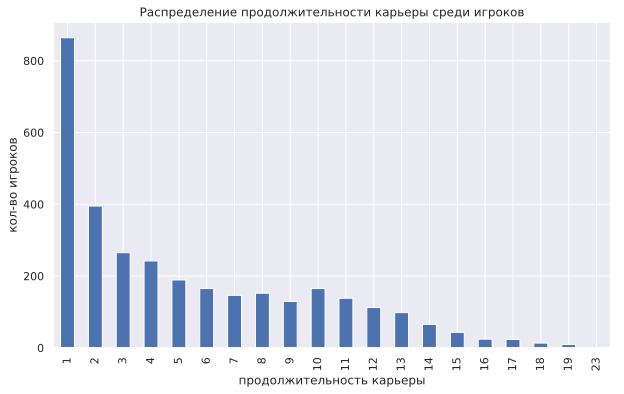

In [557]:
ax = player_data_df[player_data_df['year_end']<2018][['career_dur', 'name']].\
    groupby('career_dur').count().plot(kind='bar',figsize=(10,6), legend=False,\
    title='Распределение продолжительности карьеры среди игроков')

ax.set_xlabel("продолжительность карьеры")
ax.set_ylabel("кол-во игроков")

## 2) Корреляция среднего количества фолов и очков у игрока за матч .

In [558]:
seasons_df.head(1)

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game
1,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878


In [559]:
seasons_sum_df = seasons_df[['Player_name', 'Games', 'Assists', 'Personal Fouls', 'Points']].\
    groupby('Player_name').sum()
seasons_sum_df.head()

,Games,Assists,Personal Fouls,Points
Player_name,,,,
A.C. Green,1361,1469,2581,12928
A.J. English,151,320,287,1502
A.J. Guyton,78,145,58,442
A.J. Hammons,22,4,21,48
A.J. Price,282,607,247,1650


In [560]:
seasons_mean_df = pd.DataFrame()
for column in seasons_sum_df.columns[-3:]:
    seasons_mean_df[column] = seasons_sum_df[column]/seasons_sum_df['Games']
seasons_mean_df['Free throws %'] = seasons_df[['Player_name','Free throws %']].groupby('Player_name').mean()
seasons_mean_df.reset_index(inplace=True)

In [561]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5


In [562]:
seasons_mean_df.columns

Index(['Player_name', 'Assists', 'Personal Fouls', 'Points', 'Free throws %'], dtype='object')

In [563]:
player_data_df = player_data_df.merge(
    seasons_mean_df[['Assists', 'Personal Fouls', 'Points', 'Free throws %']],
    left_on='name', right_on=seasons_mean_df['Player_name'])
player_data_df = player_data_df.rename(columns = {'Assists': 'Assists/match', 
                                                  'Personal Fouls': 'Personal_Fouls/match', 
                                                  'Points': 'Points/match'})

In [564]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur,Assists/match,Personal_Fouls/match,Points/match,Free throws %
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5,0.327225,2.028796,6.013089,0.671375


Text(0.5,0.98,'Personal faults per match and points per match correlation')

<Figure size 1080x864 with 0 Axes>

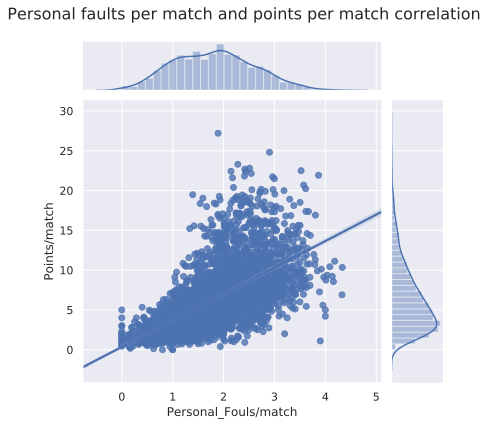

In [565]:
plt.figure(figsize=(15,12))
g = sns.jointplot(x='Personal_Fouls/match', y='Points/match', 
              data=player_data_df, kind='reg')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Personal faults per match and points per match correlation', fontsize=16)

## 3) Средний рост игрока в разные годы

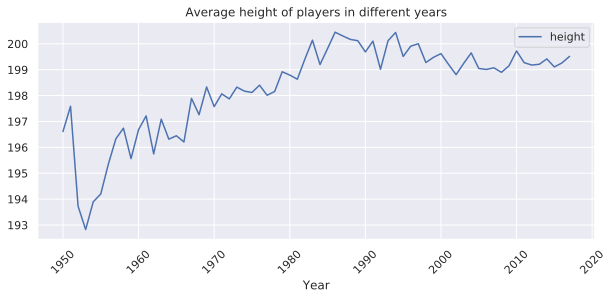

In [566]:
seasons_df = seasons_df.merge(
    player_data_df[['height']], left_on='Player_name',
    right_on=player_data_df['name'])

seasons_df[['Year', 'height']].groupby('Year').mean().\
    plot(kind='line', rot=45, figsize=(10,4), title='Average height of players in different years')

## 4)  Сравнение результативности реализации свободного броска в зависимости от позиции игрока

In [567]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [568]:
seasons_df.head()

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game,height
0,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878,188
1,1951,Cliff Barker,SG,30,INO,56,0.649,115,98,152,2.714286,188
2,1952,Cliff Barker,SG,31,INO,44,0.588,70,56,126,2.863636,188
3,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438,6.537313,193
4,1951,Leo Barnhorst,SF,26,INO,68,0.689,218,197,546,8.029412,193


In [569]:
data = []

for position in seasons_df['Position'].unique():
    data.append(
        go.Box(y=seasons_df[seasons_df['Position']==position]['Free throws %']*100, 
               name=position)
    )

In [570]:
data

[Box({
     'name': 'SG', 'y': array([70.8, 64.9, 58.8, ..., 50. , 66.7, 77.8])
 }), Box({
     'name': 'SF', 'y': array([69.8, 68.9, 65.2, ..., 65.6, 60. , 85.7])
 }), Box({
     'name': 'C', 'y': array([ 65.1,  63.2,  68.8, ...,  54.4, 100. ,  60. ])
 }), Box({
     'name': 'PG', 'y': array([62.6, 55.7, 59.3, ..., 77.5, 81.8, 80.5])
 }), Box({
     'name': 'PF', 'y': array([69. , 62.6, 59.5, ..., 71.4, 90.9, 50. ])
 })]

In [571]:
iplot(data, show_link = False)

## 5)  Сравнение распределения роста игроков для каждой позиции

In [572]:
seasons_df.head()

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game,height
0,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878,188
1,1951,Cliff Barker,SG,30,INO,56,0.649,115,98,152,2.714286,188
2,1952,Cliff Barker,SG,31,INO,44,0.588,70,56,126,2.863636,188
3,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438,6.537313,193
4,1951,Leo Barnhorst,SF,26,INO,68,0.689,218,197,546,8.029412,193


In [573]:
traces = []
for position in ['SG', 'SF', 'C', 'PG', 'PF']:
    traces.append(
        go.Histogram(
            x=seasons_df[seasons_df['Position'] == position]['height'],
            xbins=dict(
                start=160,
                end=230,
                size= 3),
            autobinx = False,
            histnorm='probability', 
            name = position, 
            visible = (position == 'SG'))
    )
    
layout = go.Layout(
    title='Player hight disrtribution',
    updatemenus=list([
        dict(
            x=1,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*4],
                    label='SG',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*3],
                    label='SF',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]*2],
                    label='C',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True] + [False]],
                    label='PG',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*4 + [True]],
                    label='PF',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)